In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset,random_split

device=('cuda' if torch.cuda.is_available() else 'cpu')

class mydataset(Dataset):
  def __init__(self,x,y):
    self.x=x
    self.y=y
  def __len__(self):
    return(len(self.x))
  def __getitem__(self,idx):
    return x[idx].to(device),y[idx].to(device)

x=torch.tensor([[0,0],[1,0],[0,1],[1,1]],dtype=torch.float32,device=device)
y=torch.tensor([0,1,1,0],dtype=torch.float32,device=device)

dataset=mydataset(x,y)
train_data=DataLoader(dataset,batch_size=1,shuffle=True)

class XORModel(nn.Module):
  def __init__(self):
    super(XORModel,self).__init__()
    self.linear1=nn.Linear(2,2,bias=True)
    self.activation1=nn.Sigmoid()
    self.linear2=nn.Linear(2,1,bias=True)
  def forward(self,x):
    x=self.linear1(x)
    x=self.activation1(x)
    x=self.linear2(x)
    return x

model=XORModel().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=0.03)
loss_fn=nn.MSELoss()

def train_one_epoch():
  total_loss=0
  for i,data in enumerate(train_data):
    input,label=data
    optimizer.zero_grad()
    output=model(input)
    loss=loss_fn(output,label)
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()
  return total_loss

for i in range(50):
  model.train(True)
  res=train_one_epoch()

input=torch.tensor([1,0],dtype=torch.float32,device=device)
model.eval()
print(model(input))

tensor([0.5055], device='cuda:0', grad_fn=<ViewBackward0>)


**MNIST**

Implement Feed Forward Neural Network with two hidden layers for classifying
handwritten digits using MNIST dataset. Display the classification accuracy in the form
of a Confusion matrix. Verify the number of learnable parameters in the model.

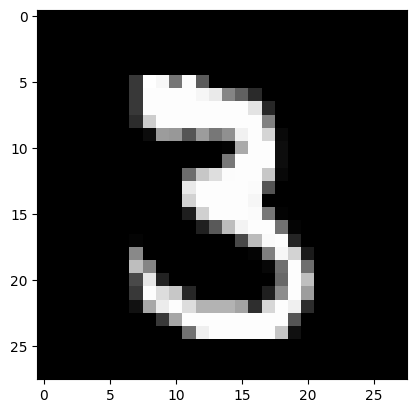

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset,random_split
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

device=('cuda' if torch.cuda.is_available() else 'cpu')

train_set=datasets.MNIST(root='./data',transform=ToTensor(),train=True,download=True)
test_set=datasets.MNIST(root='/data',transform=ToTensor(),train=False,download=True)

train_loader=DataLoader(train_set,batch_size=4,shuffle=True)
test_loader=DataLoader(test_set,batch_size=4,shuffle=False)

import matplotlib.pyplot as plt
images,label=next(iter(train_loader))
plt.imshow(images[0].reshape(28,28),cmap='gray')



In [ ]:
print(train_set.data.size())
print(test_set.data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
class MNISTClassifier(nn.Module):
  def __init__(self):
    super(MNISTClassifier,self).__init__()
    self.net=nn.Sequential(
        nn.Linear(784,100,bias=True),
        nn.ReLU(),
        nn.Linear(100,100,bias=True),
        nn.ReLU(),
        nn.Linear(100,10,bias=True)
    )
  def forward(self,x):
    return self.net(x)

model=MNISTClassifier().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()

In [ ]:
batch_size=4
def train_one_epoch():
  total_loss=0
  for i,data in enumerate(train_loader):
    input,label=data
    input,label=input.to(device),label.to(device)
    optimizer.zero_grad()
    output=model(input.view(batch_size,-1))
    loss=loss_fn(output,label)
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()
  return total_loss/len(train_loader)

for i in range(10):
  res=train_one_epoch()
  print('epoch: ',i+1,' ',res)



epoch:  1   0.3465537469379138
epoch:  2   0.3029878314390099
epoch:  3   0.27360315602275853
epoch:  4   0.24983438932771873
epoch:  5   0.22946537589872992
epoch:  6   0.21162894695261106
epoch:  7   0.19527318102797145
epoch:  8   0.18068350385828913
epoch:  9   0.16810585662222582
epoch:  10   0.15626208721320534


In [ ]:
correct=0
total=0
for i, data in enumerate(train_loader):
  input,label=data
  input,label=input.to(device),label.to(device)
  output=model(input.view(batch_size,-1))
  _,predicted=torch.max(output,1)
  total+=label.size(0)
  correct+=(predicted==label).sum()

accuracy=100*(correct/total)
print(accuracy)

tensor(95.6950, device='cuda:0')


**Practice**

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,Dataset,random_split
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

device=('cuda' if torch.cuda.is_available() else 'cpu')

train_set=datasets.MNIST(root='./data',train=True,download=True,transform=ToTensor())
test_set=datasets.MNIST(root='./data',train=False,download=True,transform=ToTensor())

batch_size=4

train_data=DataLoader(train_set,batch_size=batch_size,shuffle=True)
test_data=DataLoader(test_set,batch_size=batch_size,shuffle=False)

input,label=next(iter(train_data))
plt.imshow(input[0].resize(28,28),cmap='gray')

class MNISTClassifier(nn.Module):
  def __init__(self):
    super(MNISTClassifier,self).__init__()
    self.net=nn.Sequential(
        nn.Linear(784,100,bias=True),
        nn.Sigmoid(),
        nn.Linear(100,100,bias=True),
        nn.Sigmoid(),
        nn.Linear(100,10,bias=True)
    )
  def forward(self,x):
      return self.net(x)

model=MNISTClassifier().to(device)
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
loss_fn=nn.CrossEntropyLoss()


def train_one_epoch():
  total_loss=0
  for i, data in enumerate(train_data):
    input,label=data
    input,label=input.to(device),label.to(device)
    optimizer.zero_grad()
    output=model(input.view(batch_size,-1))
    loss=loss_fn(output,label)
    loss.backward()
    optimizer.step()
    total_loss+=loss
  return total_loss/len(train_data)

for i in range(10):
  model.train(True)
  res=train_one_epoch()
  model.eval()
  print('epoch: ',i+1,' loss: ',res)

correct=0
total=0
for i,data in enumerate(test_data):
  input,label=data
  input=input.to(device)
  label=label.to(device)
  output=model(input.view(batch_size,-1))
  _,predicted=torch.max(output,1)
  total+=label.size(0)
  correct+=(predicted==label).sum()
print(correct/total*100)


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


epoch:  1  loss:  tensor(2.3000, device='cuda:0', grad_fn=<DivBackward0>)


tensor([1.0000], grad_fn=<ViewBackward0>)
